## Contents

- Unsupervised learning
    - training the machine with labelled data
    - we provide only input
    - 2 types
        - Clusterning
        - Association

## Clustering Algorithm

- Groups similar data points to clusters
- Kmeans()

### Kmeans Clustering

- k refers to no og clusters
- To select the optimal value of K, use elbow method



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
iris_df = pd.DataFrame(iris.data,columns = iris.feature_names)

In [6]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
x = iris.data

In [11]:
from sklearn.cluster import KMeans
k = range(1,11)
l = []
for i in k:
    model = KMeans(n_clusters=i,random_state=42)
    model.fit(x)
    sse = model.inertia_
    l.append(sse)
    print("The value of sse for k = {} is {}".format(i,sse))

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


The value of sse for k = 1 is 681.3705999999996
The value of sse for k = 2 is 152.34795176035797
The value of sse for k = 3 is 78.851441426146
The value of sse for k = 4 is 57.22847321428572
The value of sse for k = 5 is 46.44618205128204
The value of sse for k = 6 is 39.03998724608725
The value of sse for k = 7 is 34.46949589883803
The value of sse for k = 8 is 30.186555194805198
The value of sse for k = 9 is 28.28937085137087
The value of sse for k = 10 is 26.552373141564328


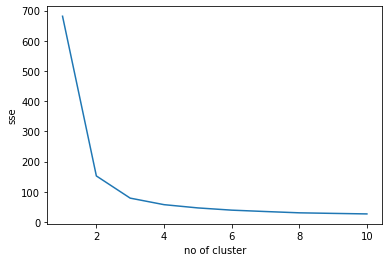

In [12]:
plt.plot(k,l)
plt.xlabel("no of cluster")
plt.ylabel("sse")
plt.show()

In [13]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3,random_state=42)
model.fit(x)

KMeans(n_clusters=3, random_state=42)

In [43]:
centers = model.cluster_centers_
centers

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [15]:
iris_df["target"]= iris.target

In [16]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [17]:
iris_df["target"].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [25]:
iris_df["pred_target"]=model.predict(x)
y = model.predict(x)

In [19]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,pred_target
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [20]:
iris_df["pred_target"].value_counts()

0    62
1    50
2    38
Name: pred_target, dtype: int64

In [21]:
# silhoutte coefficient

In [26]:
from sklearn.metrics import silhouette_score
silhouette_score(x,y)

0.5528190123564091

- +1 ->incorrectly
- -1 -> clustered
- 0 ->overlapping

In [27]:
df1 = iris_df[iris_df.pred_target == 0]
df2 = iris_df[iris_df.pred_target == 1]
df3 = iris_df[iris_df.pred_target == 2]

In [28]:
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,pred_target
50,7.0,3.2,4.7,1.4,1,0
51,6.4,3.2,4.5,1.5,1,0
53,5.5,2.3,4.0,1.3,1,0
54,6.5,2.8,4.6,1.5,1,0
55,5.7,2.8,4.5,1.3,1,0
...,...,...,...,...,...,...
133,6.3,2.8,5.1,1.5,2,0
138,6.0,3.0,4.8,1.8,2,0
142,5.8,2.7,5.1,1.9,2,0
146,6.3,2.5,5.0,1.9,2,0


In [29]:
df2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,pred_target
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
5,5.4,3.9,1.7,0.4,0,1
6,4.6,3.4,1.4,0.3,0,1
7,5.0,3.4,1.5,0.2,0,1
8,4.4,2.9,1.4,0.2,0,1
9,4.9,3.1,1.5,0.1,0,1


In [30]:
df3

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,pred_target
52,6.9,3.1,4.9,1.5,1,2
77,6.7,3.0,5.0,1.7,1,2
100,6.3,3.3,6.0,2.5,2,2
102,7.1,3.0,5.9,2.1,2,2
103,6.3,2.9,5.6,1.8,2,2
104,6.5,3.0,5.8,2.2,2,2
105,7.6,3.0,6.6,2.1,2,2
107,7.3,2.9,6.3,1.8,2,2
108,6.7,2.5,5.8,1.8,2,2
109,7.2,3.6,6.1,2.5,2,2


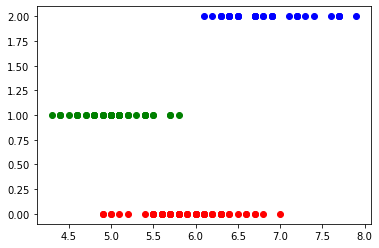

In [35]:
plt.scatter(df1["sepal length (cm)"],df1["pred_target"],color = "red")
plt.scatter(df2["sepal length (cm)"],df2["pred_target"],color = "green")
plt.scatter(df3["sepal length (cm)"],df3["pred_target"],color = "blue")

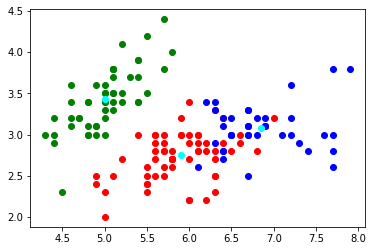

In [48]:
plt.scatter(df1["sepal length (cm)"],df1["sepal width (cm)"],color = "red")
plt.scatter(df2["sepal length (cm)"],df2["sepal width (cm)"],color = "green")
plt.scatter(df3["sepal length (cm)"],df3["sepal width (cm)"],color = "blue")
plt.scatter(model.cluster_centers_[:,0],centers[:,1],color="cyan")

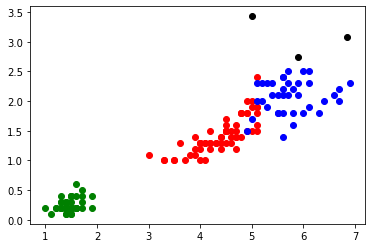

In [44]:
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],color = "red")
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"],color = "green")
plt.scatter(df3["petal length (cm)"],df3["petal width (cm)"],color = "blue")
plt.scatter(model.cluster_centers_[:,0],centers[:,1],color="black")

In [38]:
model.cluster_centers_[:0]

array([], shape=(0, 4), dtype=float64)